In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

sb.set_style("whitegrid")
sb.set_palette("husl")

In [6]:
data = pd.read_csv('../data/btcusd_1-min_data.csv')

data.head()
print(data.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


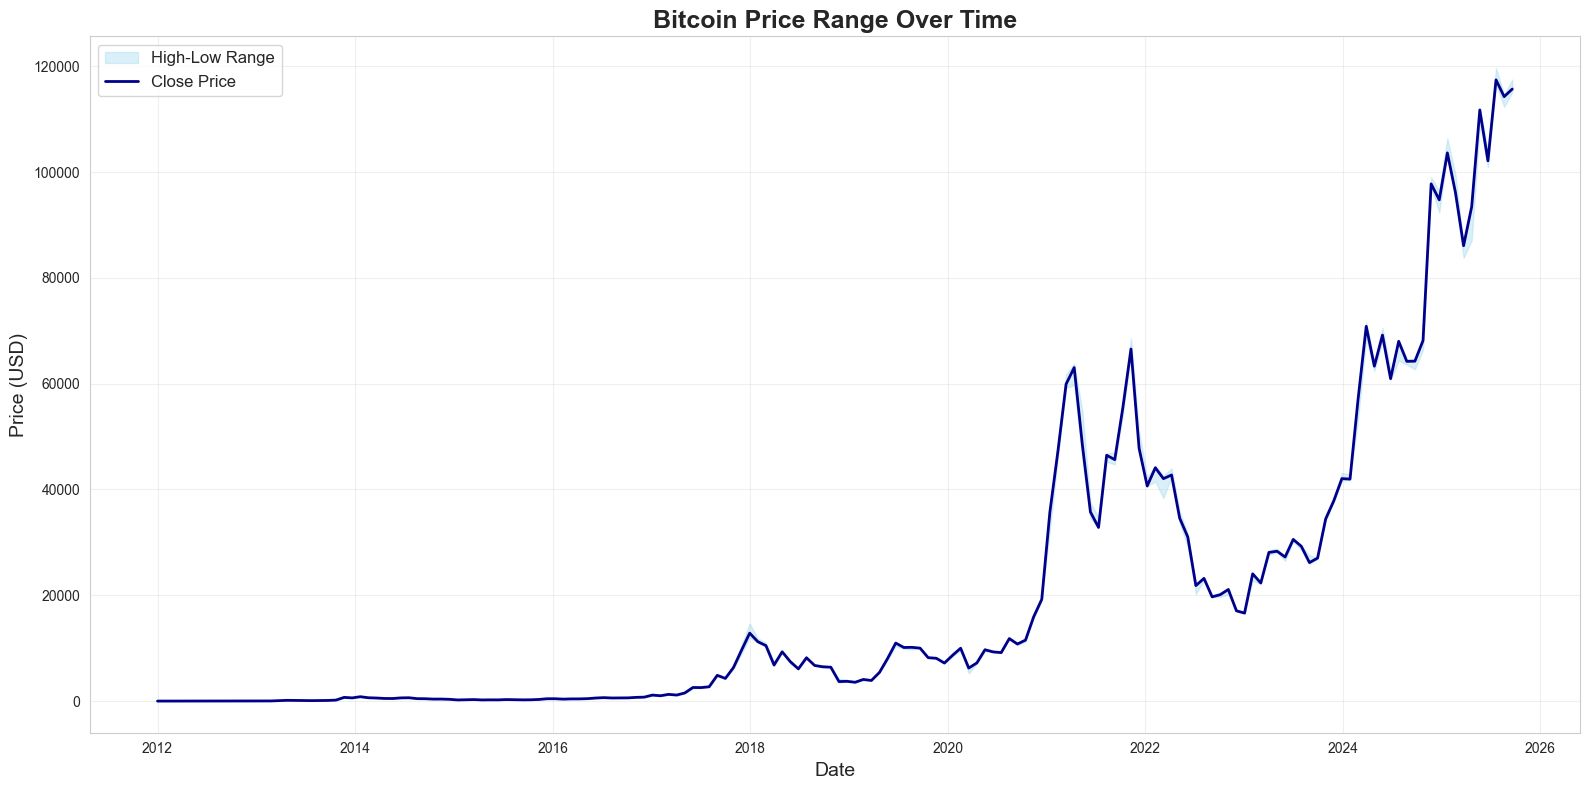

In [11]:
data['Date'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Date', inplace=True)
# changing to monthly timeframe cuz 1min too small
data_daily = data.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()
data_monthly = data_daily.iloc[::30]

plt.figure(figsize=(16, 8))
plt.fill_between(data_monthly.index, data_monthly['Low'], data_monthly['High'], 
                 alpha=0.3, label='High-Low Range', color='skyblue')
plt.plot(data_monthly.index, data_monthly['Close'], 
         linewidth=2, label='Close Price', color='darkblue')
plt.title('Bitcoin Price Range Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

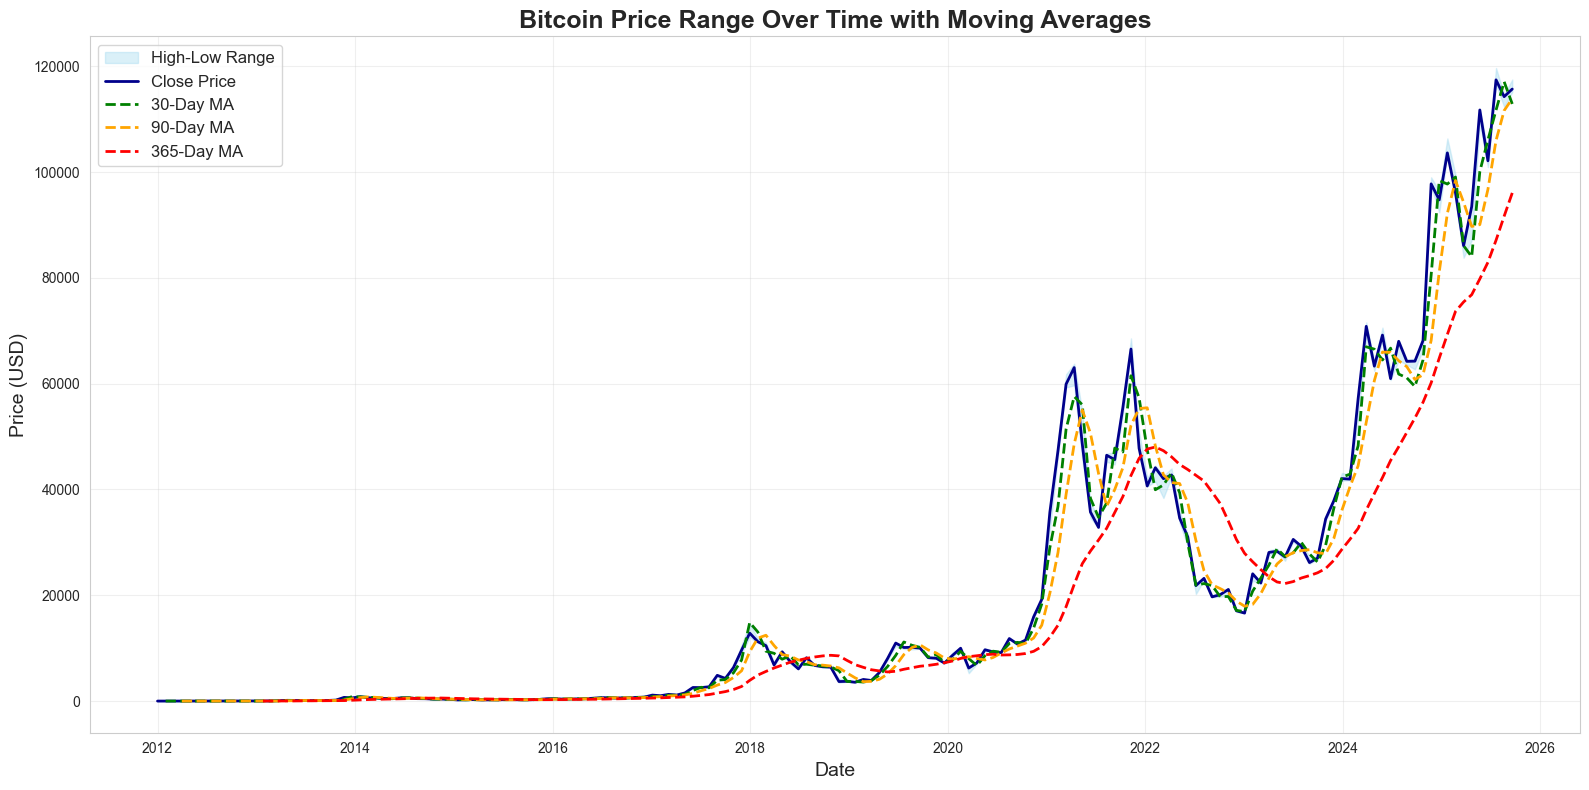

In [12]:
# Calculate moving averages
data_daily['MA_30'] = data_daily['Close'].rolling(window=30).mean()
data_daily['MA_90'] = data_daily['Close'].rolling(window=90).mean()
data_daily['MA_365'] = data_daily['Close'].rolling(window=365).mean()
data_monthly = data_daily.iloc[::30].copy()

plt.figure(figsize=(16, 8))
plt.fill_between(data_monthly.index, data_monthly['Low'], data_monthly['High'], 
                 alpha=0.3, label='High-Low Range', color='skyblue')
plt.plot(data_monthly.index, data_monthly['Close'], 
         linewidth=2, label='Close Price', color='darkblue')
plt.plot(data_monthly.index, data_monthly['MA_30'], 
         linewidth=2, label='30-Day MA', color='green', linestyle='--')
plt.plot(data_monthly.index, data_monthly['MA_90'], 
         linewidth=2, label='90-Day MA', color='orange', linestyle='--')
plt.plot(data_monthly.index, data_monthly['MA_365'], 
         linewidth=2, label='365-Day MA', color='red', linestyle='--')
plt.title('Bitcoin Price Range Over Time with Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

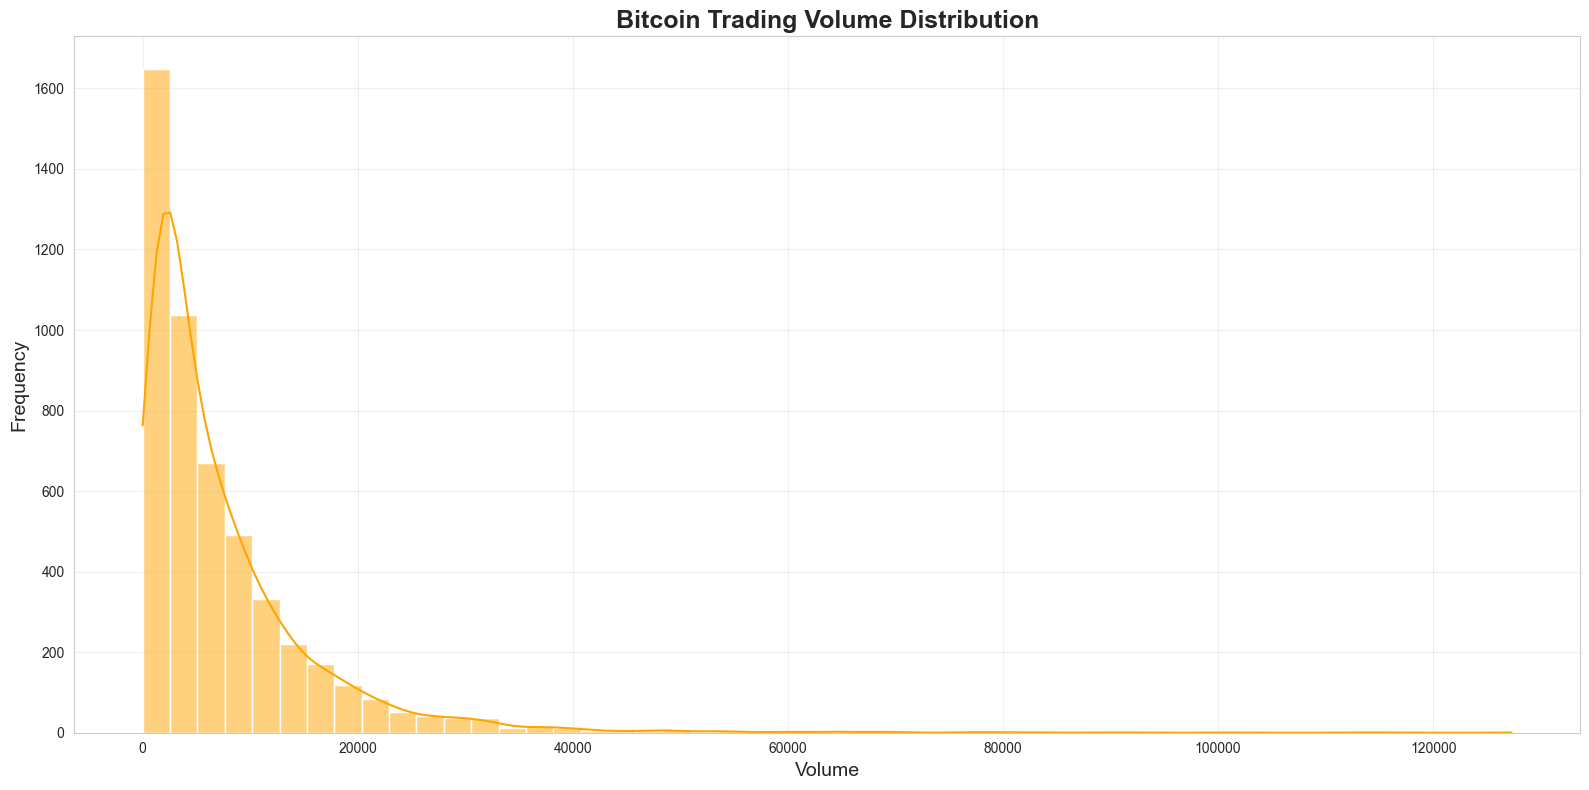

In [13]:
# Volume Histogram
plt.figure(figsize=(16, 8))
sb.histplot(data=data_daily, x='Volume', kde=True, bins=50, color='orange')
plt.title('Bitcoin Trading Volume Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()